In [1]:
import upldmx
import awkward as ak
import numpy as np

import matplotlib as mpl
import mplhep
%matplotlib inline
mpl.style.use(mplhep.style.ROOT)
import matplotlib.pyplot as plt

def title_bar(text=None, *, by_ldmx='Internal', exp_text_kw = dict(), lumitext_kw = dict(), **kwargs):
    mplhep.label.exp_text('LDMX', by_ldmx, **exp_text_kw, **kwargs)
    if text is not None:
        mplhep.label.lumitext(text, **lumitext_kw, **kwargs)

import hist

In [2]:
events = upldmx.arrays('./beam_8gev_target_calib_thresh_4000_run_0001.root')

In [3]:
events

<Array [{number: 1, run: 1, ...}, ..., {...}] type='10000 * {number: int32,...'>

In [31]:
frontcal = events.HcalScoringPlaneHits[
    (events.HcalScoringPlaneHits.plane==41)
    &(events.HcalScoringPlaneHits.momentum.pz > 0)
]

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fa86834fe30>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fa8602f4d70>, text=[])

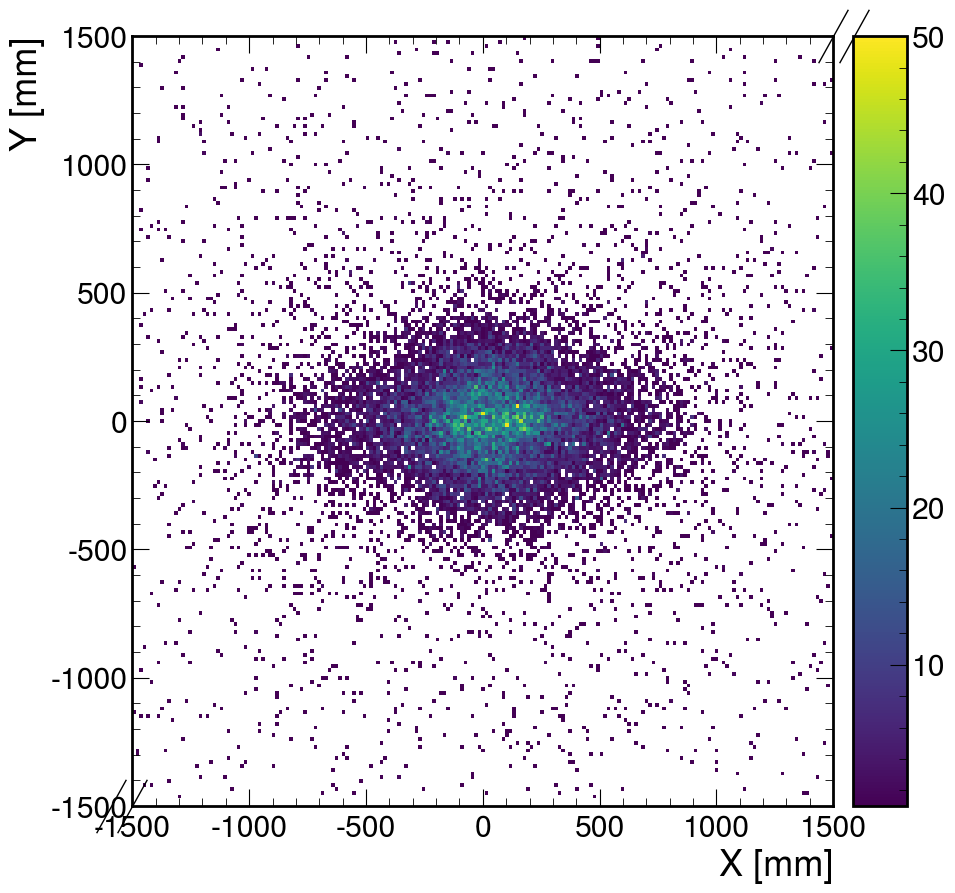

In [32]:
xy = (
    hist.Hist.new
    .Reg(201,-1500,1500,label='X [mm]')
    .Reg(201,-1500,1500,label='Y [mm]')
    .Double()
)
xy.fill(
    ak.flatten(frontcal.pos.x),
    ak.flatten(frontcal.pos.y)
)
xy.plot(cmin=1)